# Big Data & Data Analytics

Atividade 3 - Exercícios sobre KDD (Dupla)

Alunos: Luís Felippe, Welinton Haas

1. Encontre os valores aproximados de Q1, Q2, Q3 e o número de outliers da imagem abaixo:

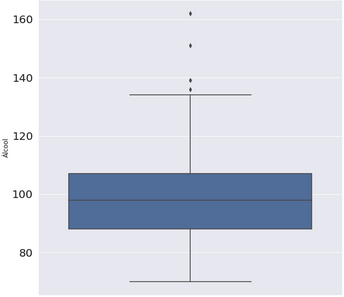

> Q1≅75 Q2≅95 Q3≅130

> Possui 4 outliners.





### Exercícios sobre análise de dados
Obs: Utilizaremos um conjunto de dados sobre doação de sangue em Taiwan. 
Contém 5 colunas: recency, frequency, monetary, time e classe. Recency significa, neste contexto, meses desde a última doação; frequency: número total de doações; monetary: total de sangue doado em cm³, time: meses desde a primeira doação. 

A classe é uma variável binária que representa: 0 se não voltou a doar em março de 2007; 1 se doou em março de 2007.


## 1. 
Carregue corretamente os dados sobre doações de sangue, utilizando o seguinte link: https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data. Renomeie corretamente o nome das colunas e abrevie como/se achar necessário. A resposta para esta questão é o próprio código de carregamento usando Pandas.

In [ ]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")

remap = {
    'Recency (months)': 'recenica',
    'Frequency (times)': 'freq',
    'Monetary (c.c. blood)': 'volume',
    'Time (months)': "ultimaVez",
    'whether he/she donated blood in March 2007': "doouEm2007"
}

df.rename(remap, axis=1, inplace=True)



## 2. 
Quais são os tipos das variáveis desse conjunto de dados? Há alguma coluna que não seja numérica? Se sim, qual?

R: De acordo com a documentação do dataset a coluna doouEm2007 é boleana

In [ ]:
df.info()

# fazendo a conversao de tipo de int64 para bool
df["doouEm2007"] = df[["doouEm2007"]].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   recenica    748 non-null    int64
 1   freq        748 non-null    int64
 2   volume      748 non-null    int64
 3   ultimaVez   748 non-null    int64
 4   doouEm2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   recenica    748 non-null    int64
 1   freq        748 non-null    int64
 2   volume      748 non-null    int64
 3   ultimaVez   748 non-null    int64
 4   doouEm2007  748 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 24.2 KB


## 3. 
Utilizando a funcionalidade de agrupamento do Pandas, descubra qual a quantidade de observações (linhas) por classe. Qual a classe com maior quantidade de observações? 

R. Classe False possui maior quantidade

In [ ]:
df.groupby(["doouEm2007"]).size()

doouEm2007
False    570
True     178
dtype: int64

##4.
 Qual a coluna do conjunto de dados com maior desvio padrão (std)? 

 R. coluna volume possui maior desvio padrão

In [ ]:
df.std()

recenica         8.095396
freq             5.839307
volume        1459.826781
ultimaVez       24.376714
doouEm2007       0.426124
dtype: float64

## 5.
 Observando o histograma da coluna frequency, o que pode ser inferido? 

R: Pode concluir-se que a maioria das pessoas doam menos de 5 vezes

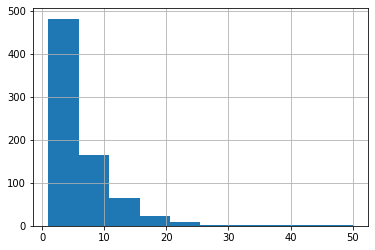

In [ ]:
df['freq'].hist();

##6. 
Observando o histograma da coluna time, o que pode ser inferido?

R: Os doadores mais novos tem a tendência maior de retornar a doar.

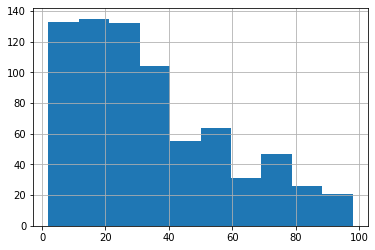

In [ ]:
df['ultimaVez'].hist();

## 7. 
Qual o maior valor observado de time (meses desde a primeira doação)?

In [ ]:
df['ultimaVez'].max()

98

## 8. 
Qual o maior valor observado de frequency? Qual o tipo (classe) dessa observação? Obs: utilizar o filtro do Pandas.

In [ ]:
import numpy as np
#df1 = df['freq'] == df['freq'].max()
#positions = np.flatnonzero(df1)
#df.iloc[positions]['doouEm2007']

df2 = df['freq'].idxmax()
df.iloc[df2]['doouEm2007']


True

## 9. 
Busque pelos exemplos de índice 0 e 50. Estas pessoas doaram no mês de Março de 2007?

R: 31 pessoas doaram em Março de 2007

In [ ]:
df['doouEm2007'].iloc[0:50].value_counts()

True     31
False    19
Name: doouEm2007, dtype: int64

## 10. 
Existem outliers neste dataset? 

R. Sim, na coluna recenica, freq e volume

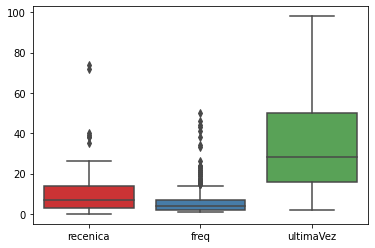

In [ ]:
import seaborn as sns

df_2 = df[['recenica', 'freq', 'ultimaVez']]
sns.boxplot(data=df_2, palette="Set1");

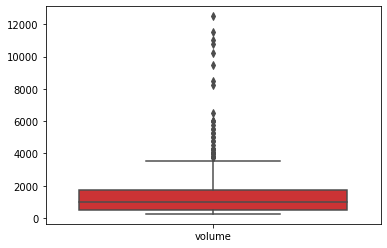

In [ ]:
df_2 = df[['volume']]
sns.boxplot(data=df_2, palette="Set1");

##11. 
Calcule o intervalo interquartílico (IIQ) da coluna monetary. Quais são os limites inferior e superior?


Intervalo interquartil  1250.0

Superior -1375
Inferior -1375


In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
IQR = Q3 - Q1
print('Intervalo interquartil ', IQR)

Intervalo interquartil  1250.0


In [ ]:
bi = Q1 - 1.5*IQR
bs = Q1 - 1.5*IQR

(bi, bs)

(-1375.0, -1375.0)